In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [24]:
# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 254s 2us/step


In [25]:
model = Sequential([
    # Convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and input shape (32x32x3)
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    # Second convolutional layer with 64 filters
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third convolutional layer with 128 filters
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the output to feed into a fully connected layer
    Flatten(),
    Dense(128, activation='relu'),

    # Output layer with 100 units (one for each class) and softmax activation
    Dense(100, activation='softmax')
])


In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [28]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2, batch_size=64)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5832 - loss: 1.4990 - val_accuracy: 0.3658 - val_loss: 2.7414
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.5892 - loss: 1.4708 - val_accuracy: 0.3663 - val_loss: 2.7972
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5979 - loss: 1.4234 - val_accuracy: 0.3659 - val_loss: 2.8832
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.6109 - loss: 1.3851 - val_accuracy: 0.3603 - val_loss: 2.8627
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6224 - loss: 1.3308 - val_accuracy: 0.3550 - val_loss: 2.9635


In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3699 - loss: 2.8754
Test accuracy: 0.3709999918937683


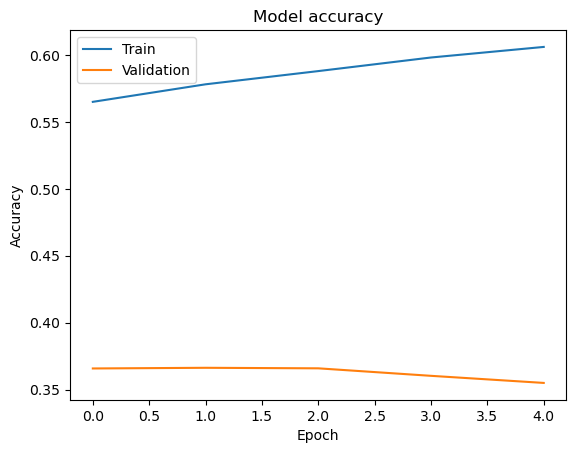

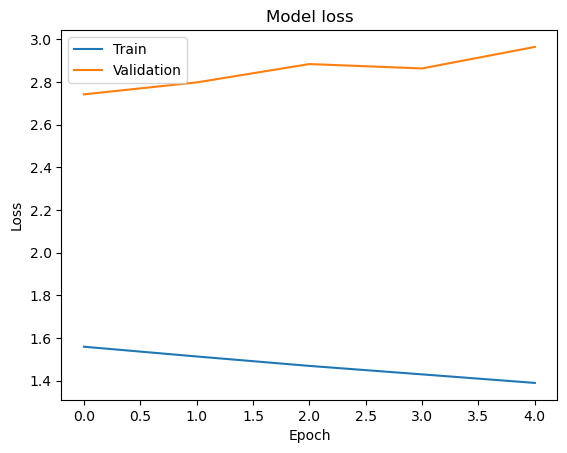

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
